# Exercise 1

In [ ]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
mnist = fetch_openml("mnist_784", as_frame=False)
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


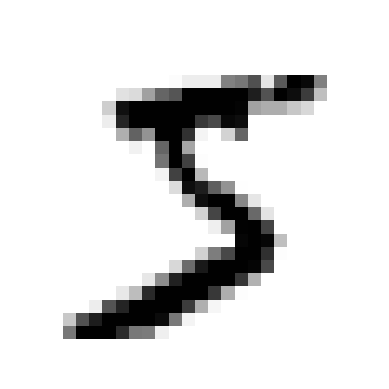

In [ ]:
plt.imshow(X[0].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
ddd

In [ ]:
params_grid = {"weights": ["uniform", "distance"], "n_neighbors": [3, 5, 10, 20, 50]}

grid_search = GridSearchCV(
    knn_clf,
    param_grid=params_grid)

# Exercise 3

In [79]:
from pathlib import Path

import pandas as pd
import zipfile

In [80]:
project_name = "titanic"

def load_data(project_name):
    zip_path = Path(f"{project_name}.zip")
    if not zip_path.is_file():
        !kaggle competitions download -c $project_name
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall()
    train_set = pd.read_csv(Path("train.csv"))
    test_set = pd.read_csv(Path("test.csv"))
    sample_submission = pd.read_csv(Path("gender_submission.csv"))
    return (train_set, test_set, sample_submission)

In [81]:
train_set, test_set, sample_submission = load_data(project_name)

In [76]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
